In [96]:
import numpy as np
from sklearn.linear_model import LogisticRegression , LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits , load_iris
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.svm import SVC

In [135]:
d = load_iris()
dir(d)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [141]:
d.data.shape 

(150, 4)

In [142]:
d.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [148]:
d.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [161]:
dataset = pd.DataFrame(d.data , columns = d.feature_names)
dataset['target']  = d.target 
dataset['flower_name'] =  dataset.target.apply(lambda x : d.target_names[x])

In [162]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


**Data Exploration**

In [165]:
dataset.groupby('flower_name').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
flower_name,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


<AxesSubplot:xlabel='flower_name'>

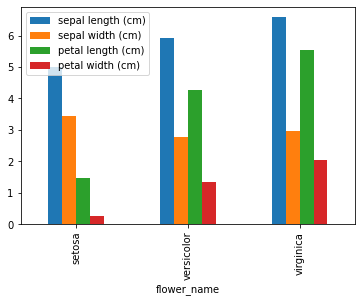

In [169]:
# plt.figure(figsize=(20,10))
dataset.drop('target' , axis =1 ).groupby('flower_name').mean().plot(kind = 'bar')

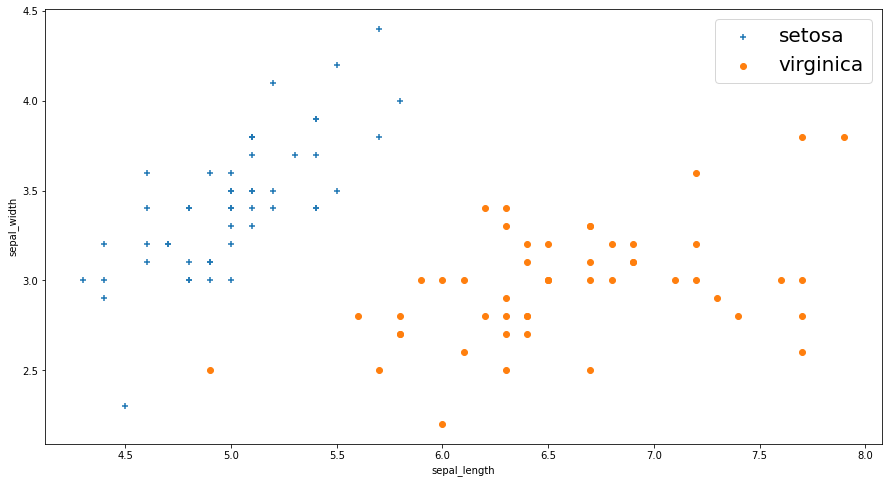

In [183]:
setosa = dataset[dataset.target == 0]
versicolor = dataset[dataset.target == 1]
virginica = dataset[dataset.target == 2]

plt.figure(figsize = (15,8))
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'] , label = "setosa" , marker = '+')
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'] , label = "virginica")
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(prop={'size': 20})
plt.show()

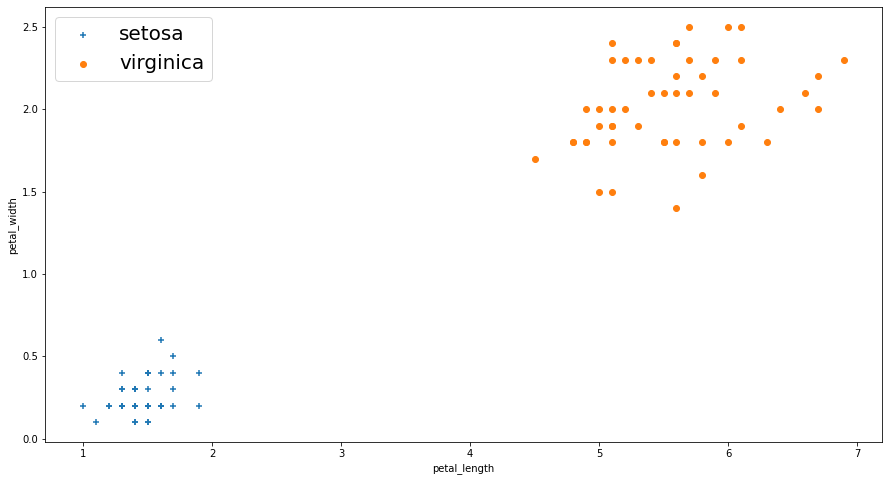

In [184]:
plt.figure(figsize = (15,8))
plt.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'] , label = "setosa" , marker = '+')
plt.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'] , label = "virginica")
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(prop={'size': 20})
plt.show()

Versicolor vs virginica


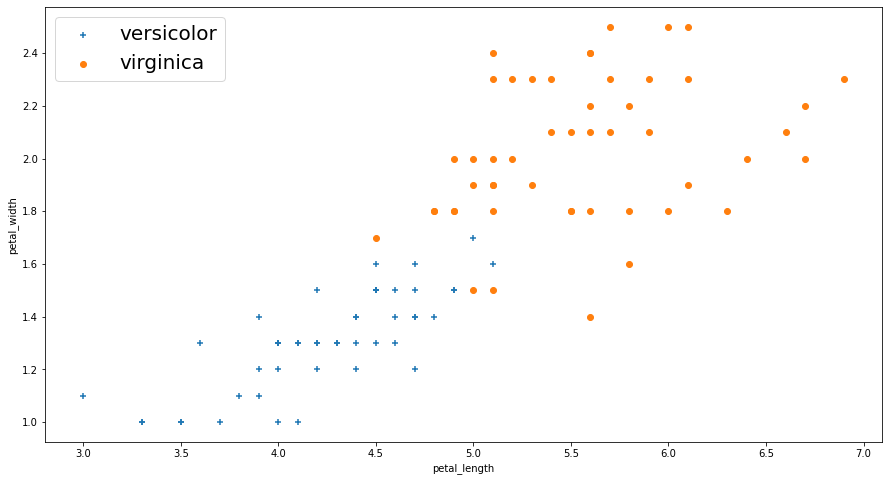

In [187]:
plt.figure(figsize = (15,8))
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'] , label = "versicolor" , marker = '+')
plt.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'] , label = "virginica")
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(prop={'size': 20})
plt.show()

## Training Model



In [189]:
def classify(model , X ,y):
    xtrain , xtest , ytrain , ytest = train_test_split(X,y)
    model.fit(xtrain , ytrain)
    return model.score(xtest , ytest)



In [191]:
X = dataset.drop(['target' , 'flower_name'],axis=1)
y = dataset.target

classify(SVC() , X,y)


0.9736842105263158

## Tune parameters


In [197]:
for i in range(1,10):
    accuracy = classify(SVC(C = i) , X,y)
    print(f"C={i} --> , {accuracy}")


C=1 --> , 0.9210526315789473
C=2 --> , 0.9736842105263158
C=3 --> , 0.9473684210526315
C=4 --> , 0.9736842105263158
C=5 --> , 1.0
C=6 --> , 1.0
C=7 --> , 0.9736842105263158
C=8 --> , 1.0
C=9 --> , 0.9473684210526315


In [201]:
kernels = ['linear' , 'rbf' , 'sigmoid' , 'poly']
for i in kernels:
    accuracy = classify(SVC(kernel = i) , X,y)
    print(f"kernel={i} --> , {accuracy}")

kernel=linear --> , 1.0
kernel=rbf --> , 0.9736842105263158
kernel=sigmoid --> , 0.2894736842105263
kernel=poly --> , 0.9736842105263158


## Evaluate model


<AxesSubplot:>

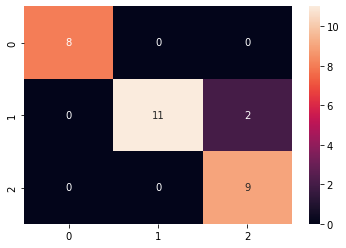

In [207]:
pred = model.predict(xtest)

sns.heatmap(confusion_matrix(ytest , pred) ,annot = True)


## Codebasics Exerscise

In [214]:
d= load_digits()
dir(digit_dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [220]:
digits = pd.DataFrame(digit_dataset.data , digit_dataset.target)
digits['target'] = d.target

In [227]:
X = digits.drop('target' , axis = 1)
y = digits['target']

for i in kernels:
    acc = classify(SVC(kernel = i) , X,y)
    print(f'kernel--> {i} , accuracy is --> {acc}')

kernel--> linear , accuracy is --> 0.98
kernel--> rbf , accuracy is --> 0.9866666666666667
kernel--> sigmoid , accuracy is --> 0.9111111111111111
kernel--> poly , accuracy is --> 0.9844444444444445
